# Common Use Cases when dealing with Hypothesis Testing

In [2]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## USE-CASE: Testing Proportions 

### Is coin biased ?
- We toss coin 250 times, 140 heads, 120 tails. 

In [197]:
# se have:
n_h = 140
n_t = 110
observations = (n_h, n_t)
n_observations = n_h + n_t
print observations, n_observations, 

(140, 110) 250


In [198]:
# We define the null hypothesis and the test statistic

def run_null_hypothesis(n_observations):
    """the model of Null hypothesis"""
    sample = [random.choice('HT') for _ in range(n_observations)]
    df = pd.DataFrame(sample)
    value_counts = df[0].value_counts()
    n_heads = value_counts['H']
    n_tails = value_counts['T']
    return (n_heads, n_tails)

def test_statistic((n_heads, n_tails)):
    """Computes the test statistic"""
    return abs(n_heads - n_tails)

In [199]:
test_stat_H0 = test_statistic(run_null_hypothesis(n_observations))
test_stat_H1 = test_statistic(observations)

print "Test Statistic for Null Hypothesis H0:",  test_stat_H0
print "Test Statistic for Hypothesis H1:",  test_stat_H1

Test Statistic for Null Hypothesis H0: 18
Test Statistic for Hypothesis H1: 30


In [200]:
# we perform iterations for good statistics
N_ITER = 1000
test_stat_H0_v = [test_statistic(run_null_hypothesis(n_observations)) for _ in range(N_ITER)]

p_value = 1. * sum([1 for test_stat_H0 in test_stat_H0_v if test_stat_H0 >= test_stat_H1])/N_ITER
print "The p-value is: ", p_value

The p-value is:  0.068


### Is dice crooked ?
- we have the frequencies {1:8, 2:9, 3:19, 4:5, 6:8, 6:11}

In [201]:
observations = {1:8, 2:9, 3:19, 4:5, 5:8, 6:11}

observations_frequencies = np.array(observations.values())
n_dice_drops = np.sum(observations_frequencies)
print n_dice_drops

60


In [202]:
def run_null_hypothesis(n_dice_drops):
    """the model of Null hypothesis"""
    dice_values = [1, 2, 3, 4, 5, 6]
    rolls = np.random.choice(dice_values, n_dice_drops, replace=True)
    return np.array(dict(pd.DataFrame(rolls)[0].value_counts()).values())

def test_statistic(dice_frequencies, n_dice_drops):
    """Computes the test statistic"""
    expected_frequencies = np.ones(6) * n_dice_drops / 6.
    return sum(abs(dice_frequencies - expected_frequencies))

In [203]:
test_stat_H0 = test_statistic(run_null_hypothesis(n_dice_drops), n_dice_drops)
test_stat_H1 = test_statistic(observations_frequencies, n_dice_drops)
print "Test Statistic for Null Hypothesis H0:",  test_stat_H0
print "Test Statistic for Hypothesis H1:",  test_stat_H1

Test Statistic for Null Hypothesis H0: 16.0
Test Statistic for Hypothesis H1: 20.0


In [207]:
# we perform iterations for good statistics
N_ITER = 1000
test_stat_H0_v = [test_statistic(run_null_hypothesis(n_dice_drops), n_dice_drops) for _ in range(N_ITER)]

p_value = 1. * sum([1 for test_stat_H0 in test_stat_H0_v if test_stat_H0 >= test_stat_H1])/N_ITER
print "The p-value is: ", p_value

The p-value is:  0.135


## USE-CASE: Testing Difference in Means 

In [141]:
d1 = np.random.normal(38.601, 1.42, 1000)
d2 = np.random.normal(38.523, 1.42, 1000)

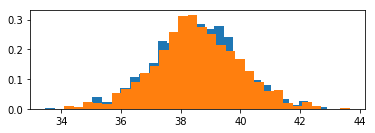

In [142]:
plt.figure(1)
plt.subplot(211)
count, bins, ignored = plt.hist(d1, 30, normed=True)
plt.figure(1)
plt.subplot(211)
count, bins, ignored = plt.hist(d2, 30, normed=True)

# plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
#                  np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
#            linewidth=2, color='r')
plt.show()

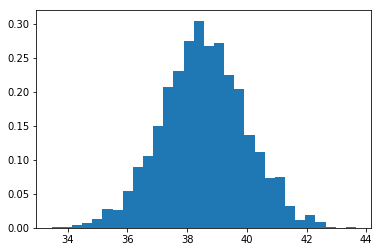

In [143]:
# one way to model the null hypothesis is by permutations, shuffle values of the two distributions and treat them as one
d_all = [i for i in d1] + [ i for i in d2]
np.random.shuffle(d_all)
count, bins, ignored = plt.hist(d_all, 30, normed=True)
plt.show()

In [144]:
def run_null_hypothesis(d1, d2):
    """the model of Null hypothesis - treat the two distributions as one"""
    d_all = [i for i in d1] + [ i for i in d2]
    np.random.shuffle(d_all)
    return (d_all[:len(d1)], d_all[len(d1):])

def test_statistic(d1, d2):
    """Computes the test statistic"""
    test_stat = abs(np.mean(d1) - np.mean(d2))
    return test_stat

In [145]:
test_stat_H0 = test_statistic(*run_null_hypothesis(d1, d2))
test_stat_H1 = test_statistic(d1, d2)
print "Test Statistic for Null Hypothesis H0:",  test_stat_H0
print "Test Statistic for Hypothesis H1:",  test_stat_H1

Test Statistic for Null Hypothesis H0: 0.013518860691434043
Test Statistic for Hypothesis H1: 0.016528175458191185


In [146]:
# we perform iterations for good statistics
N_ITER = 1000
test_stat_H0_v = [test_statistic(*run_null_hypothesis(d1, d2)) for _ in range(N_ITER)]
p_value = 1. * sum([1 for test_stat_H0 in test_stat_H0_v if test_stat_H0 >= test_stat_H1])/N_ITER
print "The p-value is: ", p_value

The p-value is:  0.802


In [147]:
# The p-value here is not small. 
# It means that we expect by chance to see an effect as big as the observed about 80% of time.

## USE-CASE: Testing a Correlation